# Purpose of the Notebook:
The task of this notebook is to fill missing values and outliers which were converted to nan values in a previous notebook with plausible values. We decided to fill the Nan values depending on plausibility, with the mean value or with the last recorded value of the feature. 

# Missing Value Treatment 

In [1]:
# imports 
import pandas as pd
import numpy as np
import orga_functions as org
import functions as func
import matplotlib.pyplot as plt

In [2]:
# read in the Codebook Dataframe 
path = org.path("02_AlleFeatureList.csv")
feature_df = pd.read_csv(path, sep =";", index_col='names')

In [3]:
feature_df

,mean,25%,50%,75%,min,max
names,,,,,,
co_gt,2.168604,1.1000,1.8000,2.9000,0.1000,5.600
pt08_s1_co,1098.303412,932.0000,1061.0000,1234.0000,647.0000,1687.000
nmhc_gt,218.607666,66.0000,145.0000,297.0000,0.1000,643.500
c6h6_gt,10.458205,4.7000,8.6000,14.4000,0.1000,28.950
pt08_s2_nmhc,953.579453,749.0000,925.0000,1130.0000,749.0000,1701.500
nox_gt,232.360072,89.0000,164.0000,303.7500,0.1000,625.875
pt08_s3_nox,848.762615,672.0000,818.0000,984.0000,204.0000,1452.000
no2_gt,106.251831,73.0000,103.0000,132.0000,0.1000,220.500
pt08_s4_no2,1507.352834,1305.0000,1508.0000,1707.0000,702.0000,2310.000


In [4]:
# read the Processed Dataframe 
df = pd.read_csv(org.path("01_AirQuality_processed.csv"), sep=';', index_col='date')

Call the method that was created for replacing outliers and false values with Nan.

In [6]:
# set unplausible/ false values to NaN
df = func.filter_plausible(df, feature_df)

In [7]:
df

,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
date,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-02-06 19:00:00,1.6,985.0,NaN,4.5,NaN,227.0,891.0,165.0,875.0,774.0,6.0,38.0,0.3584
2005-02-06 20:00:00,1.8,1002.0,NaN,5.3,780.0,252.0,855.0,179.0,892.0,857.0,5.8,36.4,0.3385
2005-02-06 21:00:00,1.4,938.0,NaN,3.7,NaN,193.0,937.0,149.0,805.0,737.0,5.8,35.4,0.3286


Check if right now the dataframe has any missing values. 

In [8]:
# Check
df.isnull().values.any()

True

> Output = False, there aren´t any missing values.
Output = True, there are values missing. 

In [9]:
# configure size of plot output
plt.rcParams['figure.figsize'] = [15, 8]

# Functions

1. Method: Replacement of NaN values by mean

In [10]:
# 1. method: 
def column_replace_na_by_mean(dframe, column):
    dframe[column] = dframe[column].fillna(feature_df.loc[column]["mean"])
    
    return dframe[column]

2. Method: Replacement of NaN values by historical data

In [11]:
# 2. method: 
def column_replace_na_by_lastvalue(dframe,column):
    dframe[column] = dframe[column].fillna(method= 'ffill')
    return dframe[column]

# Overview

## co_gt
#### Stuendlich gemittelte CO-Konzentration
Plot the feature to decide which method (of the two above) is required.

Text(0, 0.5, 'Values')

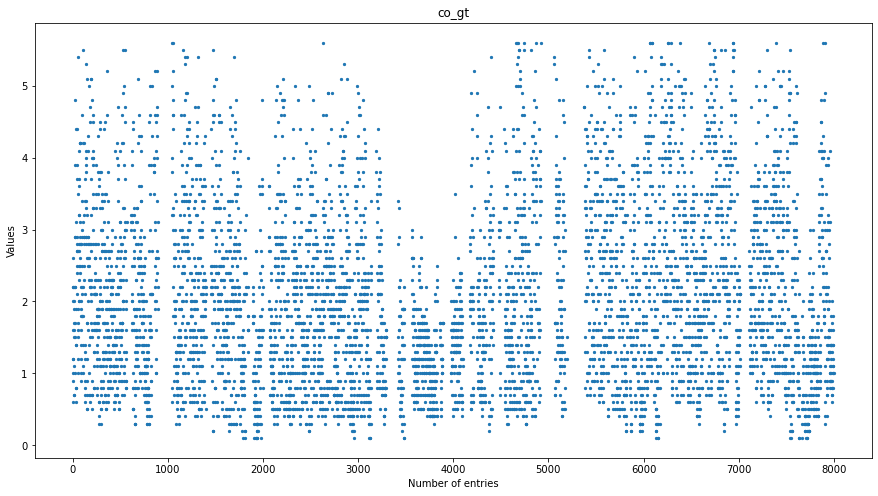

In [12]:
# Plot the feature
x_lst = df['co_gt'].reset_index(drop= True)
plt.title('co_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

> The first printout of the data gives a clear overview of how the data is distributed and what value is needed for the nan values --> we decided to replace the missing values with the mean value from our codebook, since the values are very widely distributed without triggering sudden increases or decreases.

In [13]:
# look at missing vlaues 
df.iloc[3205:3209]["co_gt"]

date
2004-07-22 07:00:00    4.4
2004-07-22 08:00:00    NaN
2004-07-22 09:00:00    NaN
2004-07-22 10:00:00    3.3
Name: co_gt, dtype: float64

Replacement of nan values in the feature co_gt with the methode.

In [14]:
# replacement of nan values
df["co_gt"] = column_replace_na_by_mean(df,"co_gt")

Recal same missing values + check if they are filled by the mean. 

In [15]:
# recal  
df.iloc[3205:3209]["co_gt"]

date
2004-07-22 07:00:00    4.400000
2004-07-22 08:00:00    2.168604
2004-07-22 09:00:00    2.168604
2004-07-22 10:00:00    3.300000
Name: co_gt, dtype: float64

Plot the feature a second time to decide if the methode is the right one.

Text(0, 0.5, 'Values')

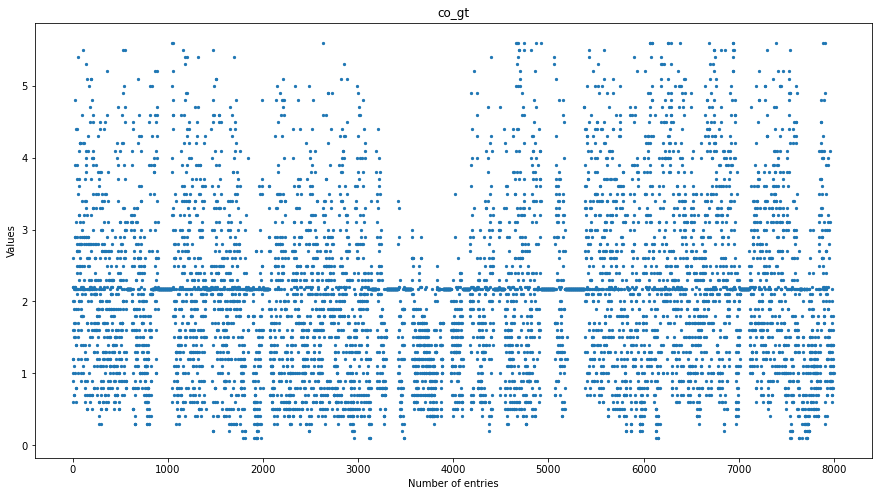

In [16]:
# Second Plot 
x_lst = df['co_gt'].reset_index(drop= True)
plt.title('co_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

> Second look at the plot to see if any big changes have occurred as a result of replacing nan values. 

## pt08_s1_co  
#### Stuendlich gemittelte Sensorreaktion (nominell auf CO ausgerichtet) (Zinnoxid)
Plot the feature to decide which method (of the two above) is required.

Text(0, 0.5, 'Values')

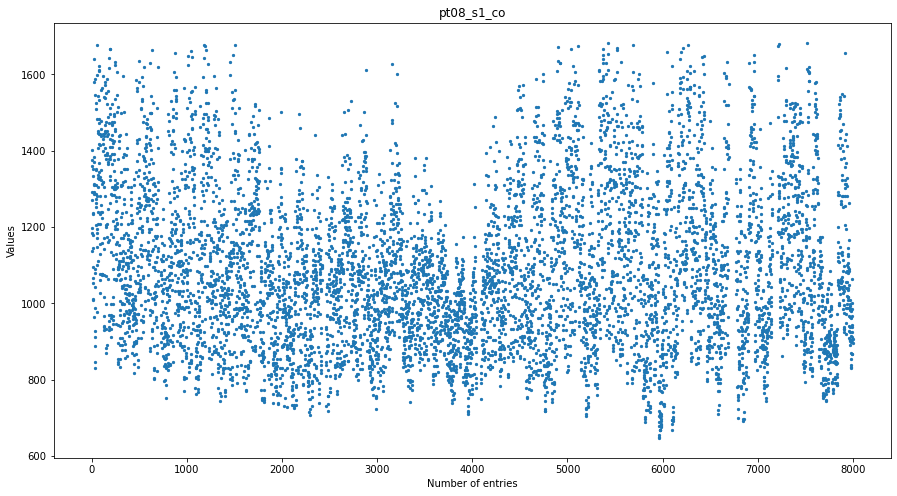

In [17]:
# Plot the feature 
x_lst = df['pt08_s1_co'].reset_index(drop= True)
plt.title('pt08_s1_co')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s1_co with the methode by mean.

In [18]:
# replacement of nan values 
df["pt08_s1_co"] = column_replace_na_by_mean(df,"pt08_s1_co")

## nmhc_gt 
#### Stuendlich gemittelte Gesamtkonzentration an nicht-metanischem Kohlenwasserstoff
Plot the feature to decide which method is required.

<function matplotlib.pyplot.show(close=None, block=None)>

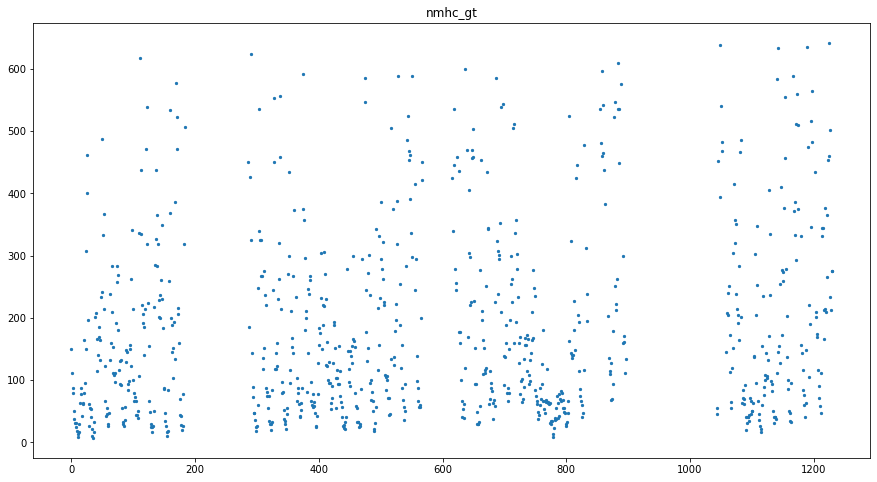

In [19]:
x_lst = df['nmhc_gt'].reset_index(drop= True)
plt.title('nmhc_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show

In [20]:
df['nmhc_gt'] = column_replace_na_by_mean(df,'nmhc_gt')

Replacement of nan values in the feature nmhc_gt with the methode by mean.

## c6h6_gt 
#### Stuendlich gemittelte Benzolkonzentration
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

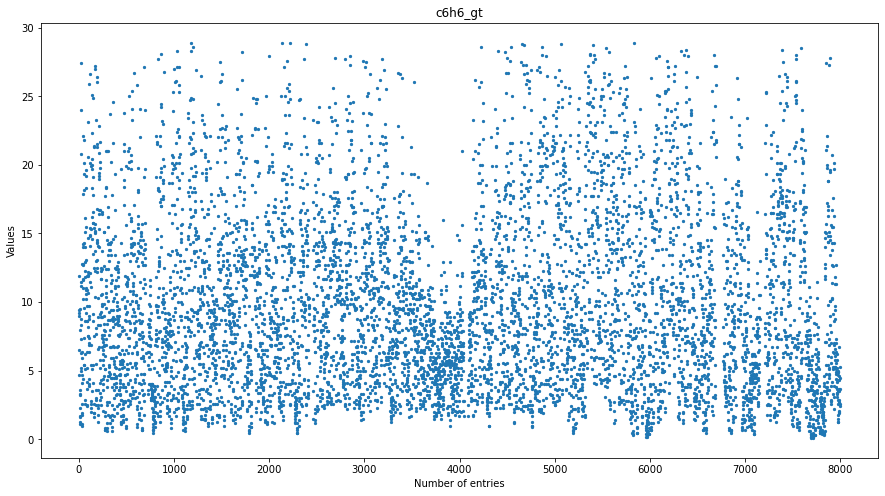

In [21]:
# Plot the feature
x_lst = df['c6h6_gt'].reset_index(drop= True)
plt.title('c6h6_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature c6h6_gt with the methode by mean.

In [22]:
# replacement of nan values
df["c6h6_gt"] = column_replace_na_by_mean(df,"c6h6_gt")

## pt08_s2_nmhc 
#### Stuendlich gemittelte Sensorreaktion (nominell auf NMHC ausgerichtet) (Titandioxid)
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

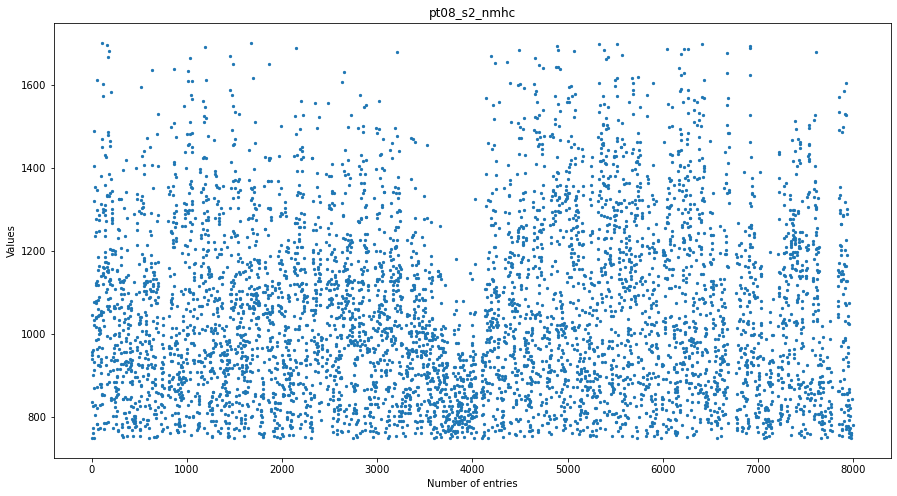

In [23]:
# Plot the feature
x_lst = df['pt08_s2_nmhc'].reset_index(drop= True)
plt.title('pt08_s2_nmhc')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s2_nmhc with the methode by mean.

In [24]:
# replacement of nan values
df["pt08_s2_nmhc"] = column_replace_na_by_mean(df,"pt08_s2_nmhc")

Second look at the feature without Nan values.

Text(0, 0.5, 'Values')

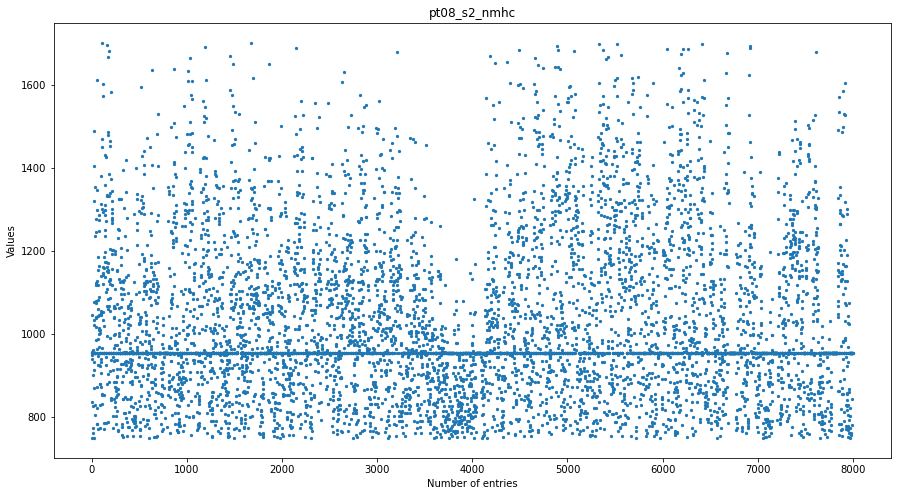

In [25]:
# second look
x_lst = df['pt08_s2_nmhc'].reset_index(drop= True)
plt.title('pt08_s2_nmhc')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

> The second look at the plot of the feature shows us that all NaN values have been replaced by the mean value, since they now stand out strongly due to their frequency. Here we see that the previous mean still needs to be optimized, since the previous mean was formed from the entire data set and not only from the values known up to time X from the past. This leads to this strongly protruding line.

> If the mean value were updated with the constantly added values, it would not be constant and there would be no such strong line. (However, this exceeds the time needed for our project and is therefore only to be considered for the further processing and live switching of the algorithm).

## nox_gt 
#### Stuendlich gemittelte NOx-Konzentration
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

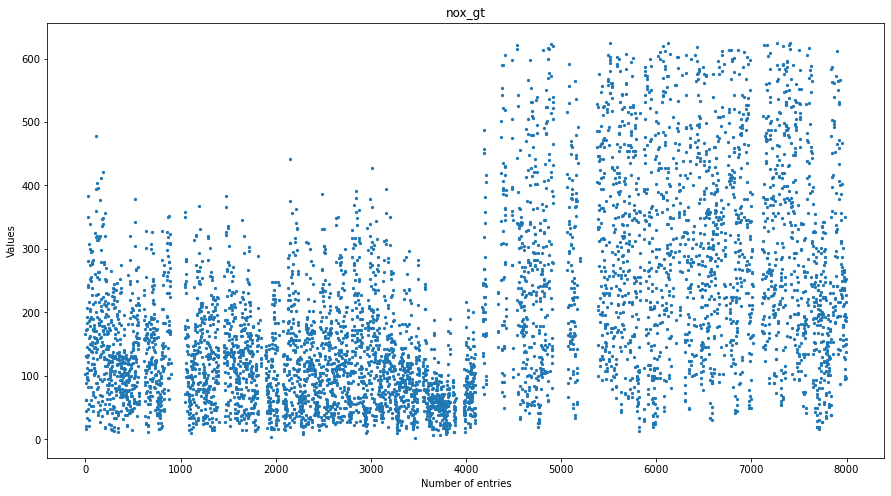

In [26]:
# Plot the feature
x_lst = df['nox_gt'].reset_index(drop= True)
plt.title('nox_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s2_nmhc with the methode by historical data
the second commented out line was an output to check if the Historical Value is actually the correct one.

In [27]:
# replacement of nan values
df["nox_gt"] = column_replace_na_by_lastvalue(df,"nox_gt")
# controll output by mean 
#df["nox_gt"]= column_replace_na_by_mean(df,"nox_gt")

Second look at the feature without Nan values.

Text(0, 0.5, 'Values')

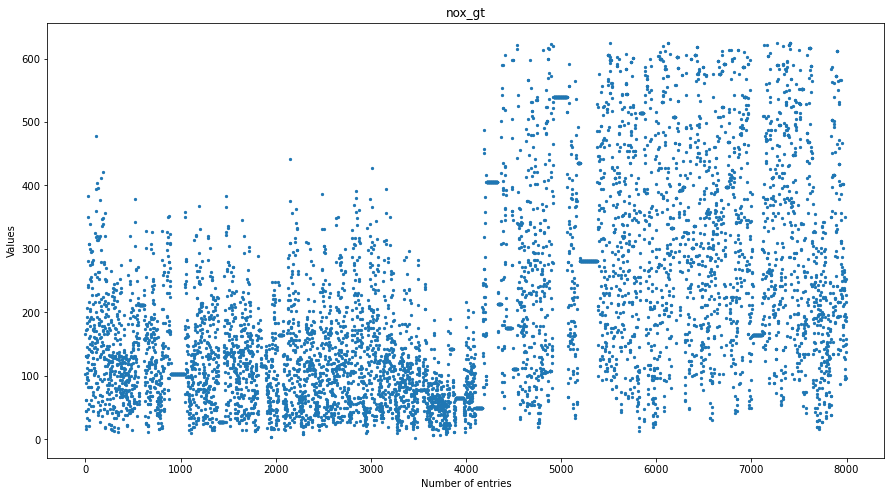

In [28]:
# second look
x_lst = df['nox_gt'].reset_index(drop= True)
plt.title('nox_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

## pt08_s3_nox 
#### Suendlich gemitteltes Sensoransprechverhalten (nominell auf NOx ausgerichtet)
Plot the feature to decide which method is required.  

Text(0, 0.5, 'Values')

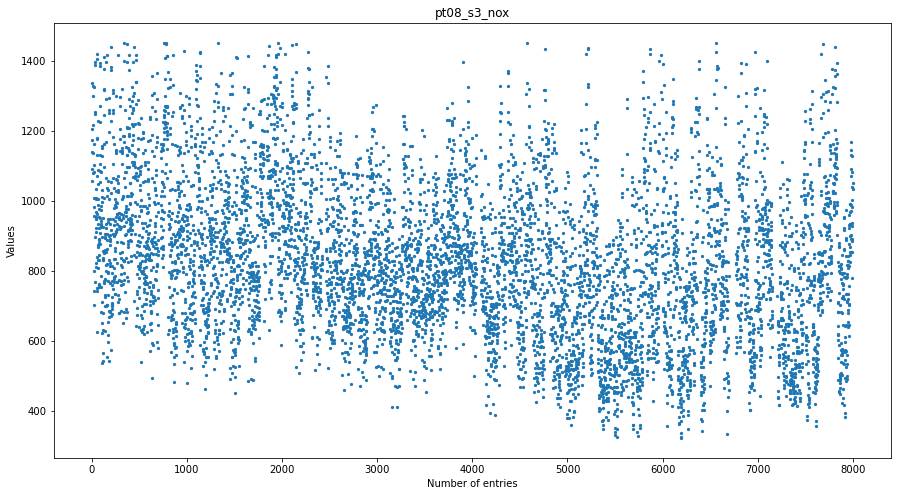

In [29]:
# Plot the feature
x_lst = df['pt08_s3_nox'].reset_index(drop= True)
plt.title('pt08_s3_nox')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s3_nox with the methode by mean.

In [30]:
# replacement of nan values
df["pt08_s3_nox"] = column_replace_na_by_mean(df,"pt08_s3_nox")

## no2_gt 
#### Stuendlich gemittelte NO2-Konzentration
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

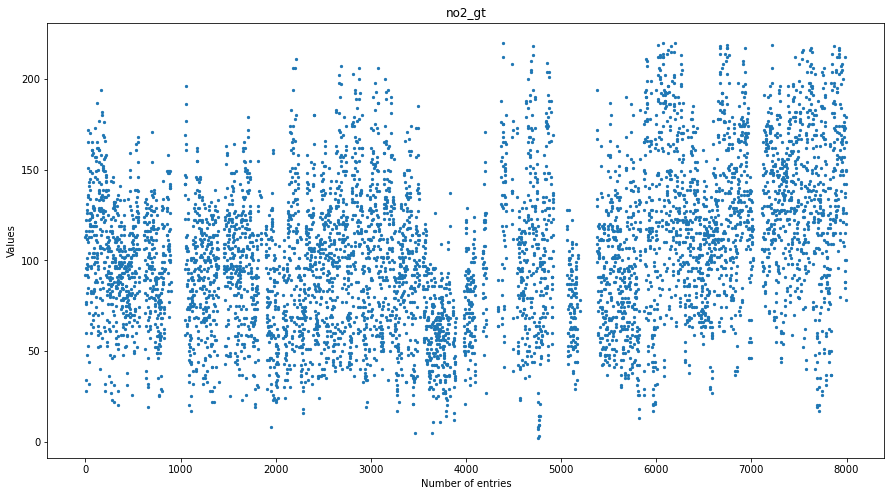

In [31]:
# Plot the feature
x_lst = df['no2_gt'].reset_index(drop= True)
plt.title('no2_gt')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature no2_gt with the methode by mean.

In [32]:
# replacement of nan values
df["no2_gt"] = column_replace_na_by_mean(df,"no2_gt")

## pt08_s4_no2 
#### Stuendlich gemittelte Sensorreaktion (nominell auf NO2 ausgerichtet) (Wolframoxid)
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

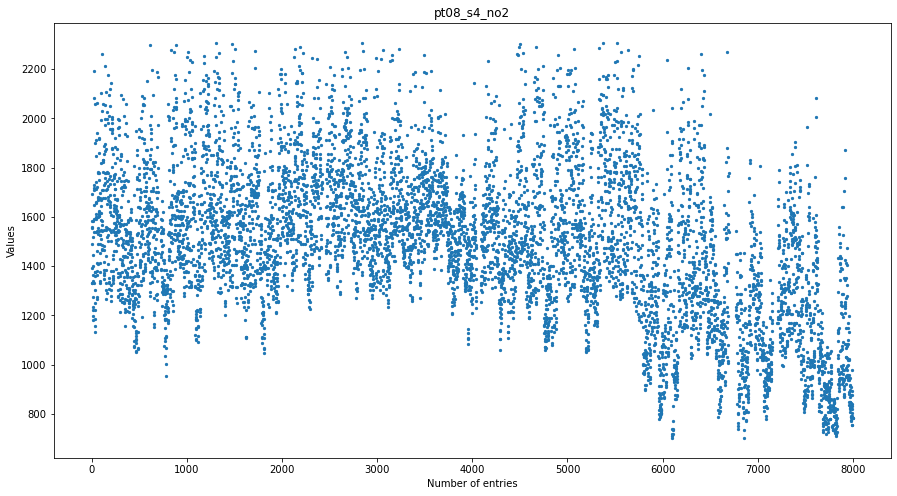

In [33]:
# Plot the feature
x_lst = df['pt08_s4_no2'].reset_index(drop= True)
plt.title('pt08_s4_no2')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s4_no2 with the methode by historical data.

In [34]:
# replacement of nan values
df["pt08_s4_no2"] = column_replace_na_by_lastvalue(df,"pt08_s4_no2")

## pt08_s5_o3
#### Stuendlich gemitteltes Sensoransprechverhalten (nominell O3-bezogen) (Indiumoxid)
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

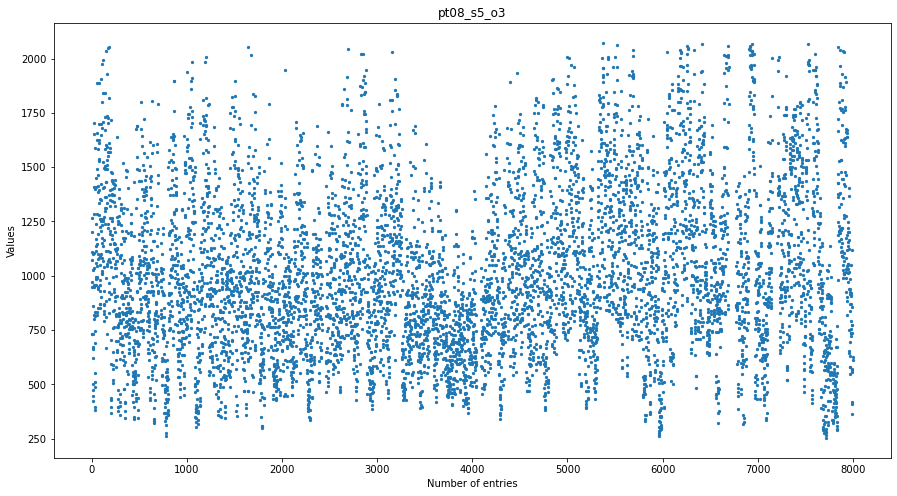

In [35]:
# Plot the feature
x_lst = df['pt08_s5_o3'].reset_index(drop= True)
plt.title('pt08_s5_o3')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s5_o3 with the methode by mean.

In [36]:
# replacement of nan values
df["pt08_s5_o3"] = column_replace_na_by_mean(df,"pt08_s5_o3")

## t 
#### Temperatur
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

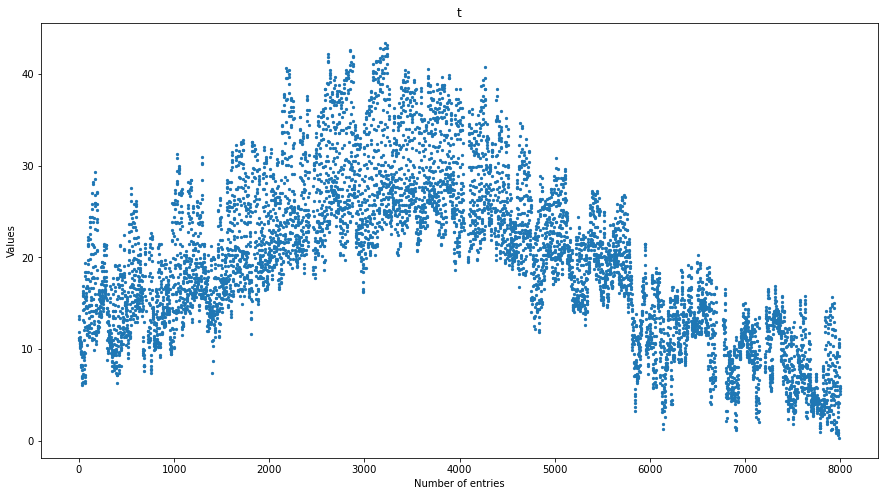

In [37]:
# Plot the feature
x_lst = df['t'].reset_index(drop= True)
plt.title('t')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature t with the methode by historical data.

In [38]:
# replacement of nan values
df["t"] = column_replace_na_by_lastvalue(df,"t")

## rh 
#### Relative Luftfeuchtigkeit
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

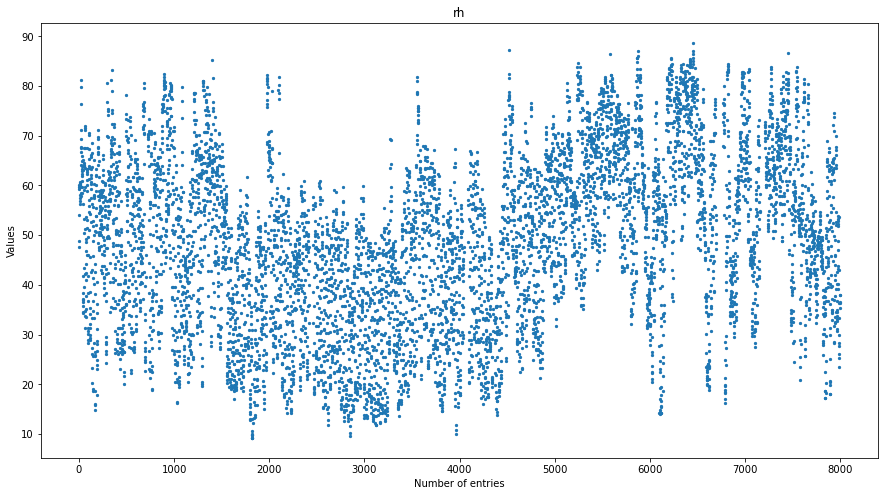

In [39]:
# Plot the feature
x_lst = df['rh'].reset_index(drop= True)
plt.title('rh')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s4_no2 with the methode by historical data.

In [40]:
# replacement of nan values
df["rh"] = column_replace_na_by_lastvalue(df,"rh")

## ah
#### Absolute Luftfeuchtigkeit
Plot the feature to decide which method is required.

Text(0, 0.5, 'Values')

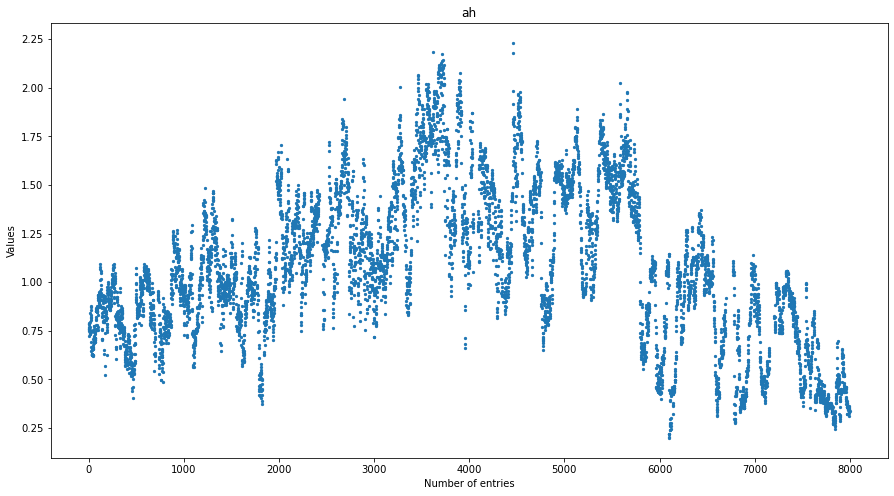

In [41]:
# Plot the feature
x_lst = df['ah'].reset_index(drop= True)
plt.title('ah')
plt.scatter(x_lst.index, x_lst.values, s=5)
plt.show
# Set the x-axis label
plt.xlabel("Number of entries")
# Set the y-axis label
plt.ylabel("Values")

Replacement of nan values in the feature pt08_s4_no2 with the methode by historical data.

In [42]:
# replacement of nan values
df["ah"] = column_replace_na_by_lastvalue(df,"ah")

# All in One

In [43]:
df = pd.read_csv(org.path("01_AirQuality_processed.csv"), sep=';')

In [44]:
from X2_MissingValueTreatment import df_replace_missing

treated_df = df_replace_missing(df)

In [45]:
treated_df

,date,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,2004-03-10 18:00:00,2.6,1360.0,150.000000,11.9,1046.000000,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.000000,9.4,955.000000,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.000000,9.0,939.000000,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.000000,9.2,948.000000,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.000000,6.5,836.000000,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2005-02-06 19:00:00,1.6,985.0,218.607666,4.5,953.579453,227.0,891.0,165.0,875.0,774.0,6.0,38.0,0.3584
7994,2005-02-06 20:00:00,1.8,1002.0,218.607666,5.3,780.000000,252.0,855.0,179.0,892.0,857.0,5.8,36.4,0.3385
7995,2005-02-06 21:00:00,1.4,938.0,218.607666,3.7,953.579453,193.0,937.0,149.0,805.0,737.0,5.8,35.4,0.3286
7996,2005-02-06 22:00:00,1.1,896.0,218.607666,2.6,953.579453,158.0,1033.0,126.0,782.0,610.0,5.4,36.6,0.3304


# Check
Reprint the whole dataframe and check if all Nan values have been replaced with the Historical or Mean values.

In [46]:
df

,date,co_gt,pt08_s1_co,nmhc_gt,c6h6_gt,pt08_s2_nmhc,nox_gt,pt08_s3_nox,no2_gt,pt08_s4_no2,pt08_s5_o3,t,rh,ah
0,2004-03-10 18:00:00,2.6,1360.0,150.000000,11.9,1046.000000,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.000000,9.4,955.000000,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.000000,9.0,939.000000,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.000000,9.2,948.000000,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.000000,6.5,836.000000,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7993,2005-02-06 19:00:00,1.6,985.0,218.607666,4.5,953.579453,227.0,891.0,165.0,875.0,774.0,6.0,38.0,0.3584
7994,2005-02-06 20:00:00,1.8,1002.0,218.607666,5.3,780.000000,252.0,855.0,179.0,892.0,857.0,5.8,36.4,0.3385
7995,2005-02-06 21:00:00,1.4,938.0,218.607666,3.7,953.579453,193.0,937.0,149.0,805.0,737.0,5.8,35.4,0.3286
7996,2005-02-06 22:00:00,1.1,896.0,218.607666,2.6,953.579453,158.0,1033.0,126.0,782.0,610.0,5.4,36.6,0.3304


Check the dataframe types. 

In [47]:
treated_df.dtypes

date             object
co_gt           float64
pt08_s1_co      float64
nmhc_gt         float64
c6h6_gt         float64
pt08_s2_nmhc    float64
nox_gt          float64
pt08_s3_nox     float64
no2_gt          float64
pt08_s4_no2     float64
pt08_s5_o3      float64
t               float64
rh              float64
ah              float64
dtype: object

Last check if there are for sure all Nan values replaced.

In [48]:
# check 
treated_df.isnull().values.any()

False

> Output = False: 
All values have been successfully replaced with a Historical value or the Mean and there are no more Nan values in the dataframe. 

Save the newly created data frame without nan values in a new csv file. 

In [49]:
# save dataset locally
new_path = org.path("02_AirQuality_processed.csv")
treated_df.to_csv(new_path, sep=';', index = False)